In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('..')
from src.models.model import VSpyct

import torch
import pyro

In [2]:
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)  # Set seed for CUDA
random.seed(0)
np.random.seed(0)

In [3]:
max_depth = 5
minimum_examples_to_split = 2
epochs = 500
bs = 128
lr = 0.001
subspace_size = 1
device = 'cpu'

In [4]:
# from scipy.io import arff
# import pandas as pd

# atp_train = pd.DataFrame(arff.loadarff('../data/raw/final_datesets/rf2-train.arff')[0]).sample(frac=1)
# atp_test = pd.DataFrame(arff.loadarff('../data/raw/final_datesets/rf2-test.arff')[0]).sample(frac=1)

In [5]:
import arff
import pandas as pd

with open('../../../../clus/data/mtr/slump/settings.ens.test.preds', 'r') as f:
    dataset = arff.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

In [6]:
df.columns

Index(['SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa', 'SLUMP_cm-pred',
       'FLOW_cm-pred', 'Compressive_Strength_Mpa-pred', 'SLUMP_cm-stdev',
       'FLOW_cm-stdev', 'Compressive_Strength_Mpa-stdev'],
      dtype='object')

In [542]:
preds = df[['SLUMP_cm-pred',
       'FLOW_cm-pred', 'Compressive_Strength_Mpa-pred']].copy().values
true = df[['SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa']].copy().values

In [544]:
normalized_mae(true, preds)

0.17596512308300663

In [545]:
perf = ('PCT-Ensemble', normalized_mae(true, preds))

In [546]:
import pickle
with open ('../../../../clus/data/mtr/slump/pct_ensemble.pcl', 'wb') as fp:
  pickle.dump(perf, fp)

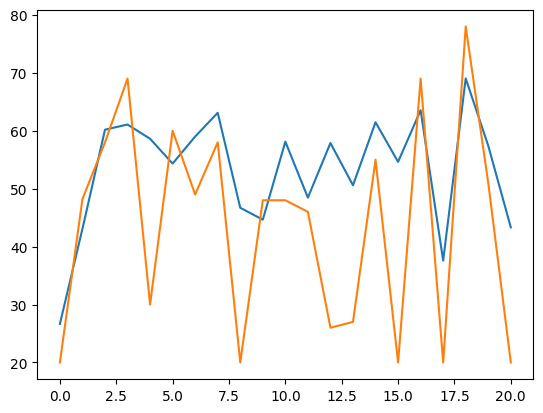

In [547]:
import matplotlib.pyplot as plt

plt.plot(preds[:, 1])
plt.plot(true[:, 1])

In [4]:
import arff
import pandas as pd

with open('../data/raw/final_datesets/rf2_mtr.arff', 'r') as f:
    dataset = arff.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Shuffle the DataFrame if needed
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
# import arff
# import pandas as pd

# with open('../data/raw/final_datesets/slump_mtr.arff', 'r') as f:
#     dataset = arff.load(f)

# # Convert the data to a pandas DataFrame
# df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# # Shuffle the DataFrame if needed
# df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,144.0,4.32,129.0,52.6,51.0,21.50,43.1,37.6,144.0,4.39,...,0.00,0.00,163.0,5.31,156.0,74.8,48.0,21.70,43.1,37.4
1,155.0,3.32,166.0,91.5,56.0,11.40,51.8,33.3,155.0,3.31,...,0.01,0.01,283.0,4.29,279.0,164.0,69.3,11.30,51.8,34.8
2,191.0,3.28,197.0,70.4,113.0,12.50,59.8,104.0,190.0,3.26,...,0.00,0.00,190.0,3.26,192.0,66.7,119.0,9.71,58.6,108.0
3,83.2,3.21,85.2,45.3,38.1,3.71,42.2,42.6,83.7,3.23,...,0.00,0.00,85.4,3.26,91.0,45.3,43.9,4.81,42.2,32.9
4,170.0,3.26,162.0,59.2,87.2,11.90,60.5,77.1,172.0,3.29,...,0.00,0.00,154.0,3.23,159.0,62.3,87.0,12.70,60.5,83.2


In [7]:
df.shape, df.shape

((3650, 584), (3650, 584))

In [8]:
lst = df.columns.tolist()
lst[-20:]

['clkm7_36to42hr__n60',
 'vali2_36to42hr__n60',
 'napm7_36to42hr__n60',
 'dldi4_36to42hr__n60',
 'chsi2_42to48hr__n60',
 'nasi2_42to48hr__n60',
 'eadm7_42to48hr__n60',
 'sclm7_42to48hr__n60',
 'clkm7_42to48hr__n60',
 'vali2_42to48hr__n60',
 'napm7_42to48hr__n60',
 'dldi4_42to48hr__n60',
 'CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']

In [9]:
# Select columns with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convert these columns to strings
df[object_columns] = df[object_columns].astype('str')


from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(df[object_columns])

# Get the new column names
encoded_cols = encoder.get_feature_names_out(object_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Combine with the original DataFrame (excluding the object columns)
df = pd.concat([df.drop(columns=object_columns), encoded_df], axis=1)

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
df.columns.tolist()

['CHSI2__0',
 'NASI2__0',
 'EADM7__0',
 'SCLM7__0',
 'CLKM7__0',
 'VALI2__0',
 'NAPM7__0',
 'DLDI4__0',
 'CHSI2__n6',
 'NASI2__n6',
 'EADM7__n6',
 'SCLM7__n6',
 'CLKM7__n6',
 'VALI2__n6',
 'NAPM7__n6',
 'DLDI4__n6',
 'CHSI2__n12',
 'NASI2__n12',
 'EADM7__n12',
 'SCLM7__n12',
 'CLKM7__n12',
 'VALI2__n12',
 'NAPM7__n12',
 'DLDI4__n12',
 'CHSI2__n18',
 'NASI2__n18',
 'EADM7__n18',
 'SCLM7__n18',
 'CLKM7__n18',
 'VALI2__n18',
 'NAPM7__n18',
 'DLDI4__n18',
 'CHSI2__n24',
 'NASI2__n24',
 'EADM7__n24',
 'SCLM7__n24',
 'CLKM7__n24',
 'VALI2__n24',
 'NAPM7__n24',
 'DLDI4__n24',
 'CHSI2__n36',
 'NASI2__n36',
 'EADM7__n36',
 'SCLM7__n36',
 'CLKM7__n36',
 'VALI2__n36',
 'NAPM7__n36',
 'DLDI4__n36',
 'CHSI2__n48',
 'NASI2__n48',
 'EADM7__n48',
 'SCLM7__n48',
 'CLKM7__n48',
 'VALI2__n48',
 'NAPM7__n48',
 'DLDI4__n48',
 'CHSI2__n60',
 'NASI2__n60',
 'EADM7__n60',
 'SCLM7__n60',
 'CLKM7__n60',
 'VALI2__n60',
 'NAPM7__n60',
 'DLDI4__n60',
 'chsi2_0to6hr__0',
 'nasi2_0to6hr__0',
 'eadm7_0to6hr__0',
 'sc

In [11]:
target_colz =     ['CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']
non_target_columns = df.columns[~df.columns.isin(target_colz)]

In [12]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,144.0,4.32,129.0,52.6,51.0,21.50,43.1,37.6,144.0,4.39,...,0.00,0.00,163.0,5.31,156.0,74.8,48.0,21.70,43.1,37.4
1,155.0,3.32,166.0,91.5,56.0,11.40,51.8,33.3,155.0,3.31,...,0.01,0.01,283.0,4.29,279.0,164.0,69.3,11.30,51.8,34.8
2,191.0,3.28,197.0,70.4,113.0,12.50,59.8,104.0,190.0,3.26,...,0.00,0.00,190.0,3.26,192.0,66.7,119.0,9.71,58.6,108.0
3,83.2,3.21,85.2,45.3,38.1,3.71,42.2,42.6,83.7,3.23,...,0.00,0.00,85.4,3.26,91.0,45.3,43.9,4.81,42.2,32.9
4,170.0,3.26,162.0,59.2,87.2,11.90,60.5,77.1,172.0,3.29,...,0.00,0.00,154.0,3.23,159.0,62.3,87.0,12.70,60.5,83.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,122.0,3.50,112.0,55.1,41.1,16.00,46.2,32.4,124.0,3.53,...,0.00,0.00,115.0,3.36,117.0,54.4,48.7,14.80,44.4,34.7
3646,136.0,5.50,116.0,48.3,44.8,23.60,37.2,36.9,135.0,5.48,...,0.00,0.00,134.0,5.38,121.0,49.1,53.9,21.20,37.2,39.4
3647,276.0,3.22,264.0,91.6,145.0,33.10,59.8,99.0,278.0,3.30,...,0.00,0.00,262.0,3.23,252.0,81.2,143.0,32.40,62.6,98.6
3648,87.6,3.85,86.4,50.1,30.5,6.86,44.7,25.4,86.8,3.72,...,0.00,0.00,92.4,3.74,86.1,47.4,32.8,6.35,44.7,21.6


In [13]:
df[non_target_columns] = df[non_target_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for_scaling = df.columns[~df.columns.isin(target_colz)].tolist()
# for_scaling = df.columns.tolist()

scaled_values = scaler.fit_transform(df[[col for col in df.columns if col in for_scaling]])
df[for_scaling] = pd.DataFrame(scaled_values, columns=for_scaling)

In [15]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,0.268726,0.686131,0.190655,0.057961,0.204398,0.617855,0.046166,0.205418,0.268206,0.509960,...,0.000000,0.00,163.0,5.31,156.0,74.8,48.0,21.70,43.1,37.4
1,0.307774,0.442822,0.345015,0.317122,0.236740,0.293513,0.114241,0.156885,0.307282,0.079681,...,0.006667,0.02,283.0,4.29,279.0,164.0,69.3,11.30,51.8,34.8
2,0.435570,0.433090,0.474343,0.176549,0.605433,0.328838,0.176839,0.954853,0.431616,0.059761,...,0.000000,0.00,190.0,3.26,192.0,66.7,119.0,9.71,58.6,108.0
3,0.052893,0.416058,0.007927,0.009327,0.120957,0.046564,0.039124,0.261851,0.053996,0.047809,...,0.000000,0.00,85.4,3.26,91.0,45.3,43.9,4.81,42.2,32.9
4,0.361022,0.428224,0.328327,0.101932,0.438551,0.309570,0.182316,0.651242,0.367673,0.071713,...,0.000000,0.00,154.0,3.23,159.0,62.3,87.0,12.70,60.5,83.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.190628,0.486618,0.119733,0.074617,0.140362,0.441233,0.070423,0.146727,0.197158,0.167331,...,0.000000,0.00,115.0,3.36,117.0,54.4,48.7,14.80,44.4,34.7
3646,0.240327,0.973236,0.136421,0.029314,0.164295,0.685292,0.000000,0.197517,0.236234,0.944223,...,0.000000,0.00,134.0,5.38,121.0,49.1,53.9,21.20,37.2,39.4
3647,0.737309,0.418491,0.753859,0.317788,0.812419,0.990366,0.176839,0.898420,0.744227,0.075697,...,0.000000,0.00,262.0,3.23,252.0,81.2,143.0,32.40,62.6,98.6
3648,0.068513,0.571776,0.012933,0.041306,0.071798,0.147720,0.058685,0.067720,0.065009,0.243028,...,0.000000,0.00,92.4,3.74,86.1,47.4,32.8,6.35,44.7,21.6


In [16]:
len(target_colz)

8

In [17]:
target_colz

['CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']

In [18]:
df.shape

(3650, 584)

In [19]:
import numpy as np

# Calculate the number of new columns (30% of current columns)
num_existing_columns = len(df.columns)
num_new_columns = int(np.ceil(num_existing_columns))

# Generate new random columns
for i in range(num_new_columns):
    new_col_name = f'Random_{i+1}'
    df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1


/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_4435/2246716273.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1
/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_4435/2246716273.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1
/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_4435/2246716273.py:10: PerformanceWarning: Data

In [20]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,Random_575,Random_576,Random_577,Random_578,Random_579,Random_580,Random_581,Random_582,Random_583,Random_584
0,0.268726,0.686131,0.190655,0.057961,0.204398,0.617855,0.046166,0.205418,0.268206,0.509960,...,0.050928,0.533403,1.006477,-0.040114,-1.818035,-0.231331,1.456774,-0.906125,-2.473753,0.414060
1,0.307774,0.442822,0.345015,0.317122,0.236740,0.293513,0.114241,0.156885,0.307282,0.079681,...,-0.717246,-1.354365,0.003140,-0.189875,1.167530,0.956750,-0.878579,-0.551021,-0.640696,-0.263961
2,0.435570,0.433090,0.474343,0.176549,0.605433,0.328838,0.176839,0.954853,0.431616,0.059761,...,0.576725,-0.577438,0.331884,0.839439,1.351412,-1.119923,0.374227,-0.468517,0.366182,-1.887552
3,0.052893,0.416058,0.007927,0.009327,0.120957,0.046564,0.039124,0.261851,0.053996,0.047809,...,-0.257671,-0.009790,1.220582,0.694781,0.077448,-0.289887,1.197246,0.246085,0.301775,0.215166
4,0.361022,0.428224,0.328327,0.101932,0.438551,0.309570,0.182316,0.651242,0.367673,0.071713,...,-0.663480,0.192403,-1.397845,0.135214,-1.566417,-0.426054,0.193817,0.027403,0.195380,0.926790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.190628,0.486618,0.119733,0.074617,0.140362,0.441233,0.070423,0.146727,0.197158,0.167331,...,0.586421,-2.747705,-0.842325,0.516883,0.784863,2.328447,-0.326774,-1.949728,-0.922541,0.711981
3646,0.240327,0.973236,0.136421,0.029314,0.164295,0.685292,0.000000,0.197517,0.236234,0.944223,...,-1.051476,1.631854,-0.301163,-0.494021,-1.611852,0.084083,-1.187931,1.528056,-2.129922,0.376446
3647,0.737309,0.418491,0.753859,0.317788,0.812419,0.990366,0.176839,0.898420,0.744227,0.075697,...,-0.580660,0.203483,-0.311717,0.461324,0.513823,-0.431668,0.372692,-0.799215,1.404710,-0.252708
3648,0.068513,0.571776,0.012933,0.041306,0.071798,0.147720,0.058685,0.067720,0.065009,0.243028,...,-0.280959,0.203951,-0.146479,-0.508016,-0.460308,-0.052627,-0.241092,1.068645,-1.318123,1.895689


In [21]:
X = df.drop(columns=target_colz)
y = df[target_colz]

In [129]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
train.columns

Index(['timeunit', 'storageCost', 'interestRate', 'compidx0lt2',
       'compidx0lt2l1', 'compidx0lt2l2', 'compidx0lt2l4', 'compidx0lt2l8',
       'compidx1lt2', 'compidx2lt2',
       ...
       'Random_287', 'Random_288', 'Random_289', 'Random_290', 'Random_291',
       'Random_292', 'Random_293', 'Random_294', 'Random_295', 'Random_296'],
      dtype='object', length=592)

In [28]:
import arff

# Convert DataFrame to ARFF format
def dataframe_to_arff(df, file_path, relation_name="relation"):
    attributes = []
    for col in df.columns:
        if df[col].dtype.kind in "biufc":  # Numeric
            attributes.append((col, "NUMERIC"))
        elif df[col].dtype.kind == "O":  # Object/String
            attributes.append((col, "STRING"))
        elif df[col].dtype.name == "category":  # Categorical
            attributes.append((col, df[col].cat.categories.tolist()))
    
    arff_data = {
        "relation": relation_name,
        "attributes": attributes,
        "data": df.values.tolist(),
    }

    # Write ARFF file
    with open(file_path, "w") as f:
        arff.dump(arff_data, f)

In [517]:
# Save to ARFF file
dataframe_to_arff(train, '../../../../clus/data/mtr/slump/slump_train.arff', relation_name="example")
dataframe_to_arff(test, '../../../../clus/data/mtr/slump/slump_test.arff', relation_name="example")

In [29]:
# X = df.drop(columns=target_colz).values
# y = df[target_colz].values

In [22]:
from sklearn.model_selection import train_test_split

x_atp_train, x_atp_test, y_atp_train, y_atp_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [23]:
from spyct import Model

ensemble_spyct = Model(num_trees=10)
single_spyct = Model(num_trees=1)

single_spyct.fit(x_atp_train, y_atp_train)
ensemble_spyct.fit(x_atp_train, y_atp_train)

In [24]:
torch.tensor(y_atp_train).shape

torch.Size([2920, 8])

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

torch.tensor(scaler.fit_transform(y_atp_train)).shape

torch.Size([2920, 8])

In [26]:
vspyct = VSpyct(bs=bs, max_depth=max_depth, epochs=epochs, lr=lr, minimum_examples_to_split=minimum_examples_to_split)
vspyct.fit(torch.Tensor(x_atp_train), torch.Tensor(y_atp_train))

Total variance: 3778.89599609375


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Epochs: 100%|██████████| 500/500 [00:54<00:00,  9.20it/s]


Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([1174]) Var left tensor(3935.7678)
Rows right:  torch.Size([1746]) Var right tensor(1317.6691)


Epochs:  77%|███████▋  | 385/500 [00:25<00:07, 15.14it/s]


Early stopping at epoch 385.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([635]) Var left tensor(1541.1068)
Rows right:  torch.Size([1111]) Var right tensor(1180.8320)


Epochs:  83%|████████▎ | 413/500 [00:17<00:03, 23.87it/s]


Early stopping at epoch 413.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([714]) Var left tensor(1059.2703)
Rows right:  torch.Size([397]) Var right tensor(955.3632)


Epochs:  38%|███▊      | 190/500 [00:03<00:05, 53.08it/s]


Early stopping at epoch 190.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([206]) Var left tensor(856.8068)
Rows right:  torch.Size([191]) Var right tensor(1050.5663)


Epochs:  21%|██        | 103/500 [00:00<00:03, 105.36it/s]


Early stopping at epoch 103.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([95]) Var left tensor(835.8770)
Rows right:  torch.Size([96]) Var right tensor(1214.3992)


Epochs:  30%|███       | 152/500 [00:01<00:03, 107.68it/s]


Early stopping at epoch 152.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([106]) Var left tensor(945.9944)
Rows right:  torch.Size([100]) Var right tensor(658.9860)


Epochs:  37%|███▋      | 185/500 [00:05<00:08, 35.29it/s]


Early stopping at epoch 185.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([431]) Var left tensor(1156.1140)
Rows right:  torch.Size([283]) Var right tensor(861.4360)


Epochs:  27%|██▋       | 137/500 [00:01<00:04, 72.93it/s]


Early stopping at epoch 137.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([137]) Var left tensor(992.7505)
Rows right:  torch.Size([146]) Var right tensor(597.5873)


Epochs:  22%|██▏       | 110/500 [00:02<00:07, 53.90it/s]


Early stopping at epoch 110.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([163]) Var left tensor(1529.8273)
Rows right:  torch.Size([268]) Var right tensor(828.9031)


Epochs:  29%|██▉       | 146/500 [00:03<00:08, 41.91it/s]


Early stopping at epoch 146.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([302]) Var left tensor(1394.2019)
Rows right:  torch.Size([333]) Var right tensor(1657.1643)


Epochs:  14%|█▍        | 70/500 [00:01<00:06, 69.65it/s]


Early stopping at epoch 70.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([154]) Var left tensor(1174.4125)
Rows right:  torch.Size([179]) Var right tensor(1957.2716)


Epochs:  24%|██▎       | 118/500 [00:01<00:03, 107.88it/s]


Early stopping at epoch 118.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([101]) Var left tensor(1308.4856)
Rows right:  torch.Size([78]) Var right tensor(1973.5215)


Epochs:  29%|██▊       | 143/500 [00:01<00:03, 110.41it/s]


Early stopping at epoch 143.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([73]) Var left tensor(1181.4481)
Rows right:  torch.Size([81]) Var right tensor(1045.9329)


Epochs:  19%|█▉        | 96/500 [00:01<00:05, 71.25it/s]


Early stopping at epoch 96.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([164]) Var left tensor(950.4075)
Rows right:  torch.Size([138]) Var right tensor(1711.7941)


Epochs:   1%|          | 6/500 [00:00<00:14, 34.26it/s]


Early stopping at epoch 6.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([80]) Var left tensor(1596.3319)
Rows right:  torch.Size([58]) Var right tensor(1847.1958)


Epochs:  20%|██        | 102/500 [00:00<00:03, 108.54it/s]


Early stopping at epoch 102.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([74]) Var left tensor(1042.1034)
Rows right:  torch.Size([90]) Var right tensor(578.4719)


Epochs:  93%|█████████▎| 466/500 [00:21<00:01, 21.69it/s]


Early stopping at epoch 466.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([593]) Var left tensor(3886.7993)
Rows right:  torch.Size([581]) Var right tensor(2783.6821)


Epochs:  24%|██▍       | 121/500 [00:02<00:09, 41.81it/s]


Early stopping at epoch 121.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([262]) Var left tensor(3473.5378)
Rows right:  torch.Size([319]) Var right tensor(1686.8593)


Epochs:  25%|██▌       | 127/500 [00:01<00:05, 71.68it/s]


Early stopping at epoch 127.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([201]) Var left tensor(946.0464)
Rows right:  torch.Size([118]) Var right tensor(2511.0259)


Epochs:   6%|▌         | 29/500 [00:00<00:02, 196.12it/s]


Early stopping at epoch 29.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([79]) Var left tensor(2654.8406)
Rows right:  torch.Size([39]) Var right tensor(1744.7551)


Epochs:  32%|███▏      | 158/500 [00:01<00:03, 108.25it/s]


Early stopping at epoch 158.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([93]) Var left tensor(1194.5756)
Rows right:  torch.Size([108]) Var right tensor(422.3156)


Epochs:  21%|██        | 106/500 [00:01<00:05, 68.40it/s]


Early stopping at epoch 106.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([144]) Var left tensor(3058.7178)
Rows right:  torch.Size([118]) Var right tensor(3107.9785)


Epochs:   4%|▍         | 21/500 [00:00<00:02, 189.74it/s]


Early stopping at epoch 21.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([61]) Var left tensor(2501.0396)
Rows right:  torch.Size([57]) Var right tensor(3506.0759)


Epochs:  13%|█▎        | 65/500 [00:00<00:04, 108.47it/s]


Early stopping at epoch 65.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([56]) Var left tensor(2399.4487)
Rows right:  torch.Size([88]) Var right tensor(3080.5820)


Epochs:  34%|███▍      | 172/500 [00:03<00:07, 43.19it/s]


Early stopping at epoch 172.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([289]) Var left tensor(3871.5654)
Rows right:  torch.Size([304]) Var right tensor(3459.7354)


Epochs:  23%|██▎       | 113/500 [00:01<00:05, 68.52it/s]


Early stopping at epoch 113.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([174]) Var left tensor(2155.2715)
Rows right:  torch.Size([130]) Var right tensor(3893.7815)


Epochs:  18%|█▊        | 90/500 [00:00<00:03, 109.14it/s]


Early stopping at epoch 90.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([64]) Var left tensor(3227.2388)
Rows right:  torch.Size([66]) Var right tensor(2963.9126)


Epochs:  23%|██▎       | 113/500 [00:01<00:03, 108.45it/s]


Early stopping at epoch 113.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([107]) Var left tensor(2141.6790)
Rows right:  torch.Size([67]) Var right tensor(2012.9716)


Epochs:  22%|██▏       | 108/500 [00:01<00:05, 69.51it/s]


Early stopping at epoch 108.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([176]) Var left tensor(3663.3977)
Rows right:  torch.Size([113]) Var right tensor(3997.0134)


Epochs:   4%|▍         | 19/500 [00:00<00:02, 182.91it/s]

Early stopping at epoch 32.


Epochs:   6%|▋         | 32/500 [00:00<00:02, 188.32it/s]


Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([53]) Var left tensor(3233.6426)
Rows right:  torch.Size([60]) Var right tensor(3959.3921)


Epochs:  21%|██        | 104/500 [00:00<00:03, 107.53it/s]

Early stopping at epoch 104.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([76]) Var left tensor(3122.9927)
Rows right:  torch.Size([100]) Var right tensor(3205.9229)


In [27]:
vspyct.feature_importances().shape

torch.Size([1160])

In [28]:
df.shape

(3650, 1168)

In [39]:
dct = dict(zip(X.columns.tolist(), vspyct.feature_importances().tolist()))
random_cols = [col for col in list(dct.keys()) if 'Random' in col]
other_cols = [col for col in list(dct.keys()) if col not in random_cols]

In [40]:
X

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,Random_575,Random_576,Random_577,Random_578,Random_579,Random_580,Random_581,Random_582,Random_583,Random_584
0,0.268726,0.686131,0.190655,0.057961,0.204398,0.617855,0.046166,0.205418,0.268206,0.509960,...,0.050928,0.533403,1.006477,-0.040114,-1.818035,-0.231331,1.456774,-0.906125,-2.473753,0.414060
1,0.307774,0.442822,0.345015,0.317122,0.236740,0.293513,0.114241,0.156885,0.307282,0.079681,...,-0.717246,-1.354365,0.003140,-0.189875,1.167530,0.956750,-0.878579,-0.551021,-0.640696,-0.263961
2,0.435570,0.433090,0.474343,0.176549,0.605433,0.328838,0.176839,0.954853,0.431616,0.059761,...,0.576725,-0.577438,0.331884,0.839439,1.351412,-1.119923,0.374227,-0.468517,0.366182,-1.887552
3,0.052893,0.416058,0.007927,0.009327,0.120957,0.046564,0.039124,0.261851,0.053996,0.047809,...,-0.257671,-0.009790,1.220582,0.694781,0.077448,-0.289887,1.197246,0.246085,0.301775,0.215166
4,0.361022,0.428224,0.328327,0.101932,0.438551,0.309570,0.182316,0.651242,0.367673,0.071713,...,-0.663480,0.192403,-1.397845,0.135214,-1.566417,-0.426054,0.193817,0.027403,0.195380,0.926790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.190628,0.486618,0.119733,0.074617,0.140362,0.441233,0.070423,0.146727,0.197158,0.167331,...,0.586421,-2.747705,-0.842325,0.516883,0.784863,2.328447,-0.326774,-1.949728,-0.922541,0.711981
3646,0.240327,0.973236,0.136421,0.029314,0.164295,0.685292,0.000000,0.197517,0.236234,0.944223,...,-1.051476,1.631854,-0.301163,-0.494021,-1.611852,0.084083,-1.187931,1.528056,-2.129922,0.376446
3647,0.737309,0.418491,0.753859,0.317788,0.812419,0.990366,0.176839,0.898420,0.744227,0.075697,...,-0.580660,0.203483,-0.311717,0.461324,0.513823,-0.431668,0.372692,-0.799215,1.404710,-0.252708
3648,0.068513,0.571776,0.012933,0.041306,0.071798,0.147720,0.058685,0.067720,0.065009,0.243028,...,-0.280959,0.203951,-0.146479,-0.508016,-0.460308,-0.052627,-0.241092,1.068645,-1.318123,1.895689


In [43]:
# Prepare data for plotting
random_vals = [dct[col] for col in random_cols]
other_vals = [dct[col] for col in other_cols]

In [44]:
ensemble_spyct.feature_importances

array([0.1918644 , 0.17849629, 0.21677533, ..., 0.03818631, 0.09491839,
       0.04225751])

In [45]:
len(random_cols)

584

In [46]:
vspyct.feature_importances()

tensor([0.1478, 0.3323, 0.2393,  ..., 0.0859, 0.0758, 0.0715])

In [47]:
sum(random_vals)/len(random_vals), sum(other_vals)/len(other_vals)

(0.09378422826069267, 0.12985619936888623)

In [49]:
dct

{'CHSI2__0': 0.14690838754177094,
 'NASI2__0': 0.33025550842285156,
 'EADM7__0': 0.23896059393882751,
 'SCLM7__0': 0.24251800775527954,
 'CLKM7__0': 0.14104458689689636,
 'VALI2__0': 0.11120669543743134,
 'NAPM7__0': 0.10798114538192749,
 'DLDI4__0': 0.17303647100925446,
 'CHSI2__n6': 0.1537451446056366,
 'NASI2__n6': 0.17967906594276428,
 'EADM7__n6': 0.2579668462276459,
 'SCLM7__n6': 0.24619443714618683,
 'CLKM7__n6': 0.16197393834590912,
 'VALI2__n6': 0.13741330802440643,
 'NAPM7__n6': 0.0976431593298912,
 'DLDI4__n6': 0.21821022033691406,
 'CHSI2__n12': 0.10558707267045975,
 'NASI2__n12': 0.3025204837322235,
 'EADM7__n12': 0.20518288016319275,
 'SCLM7__n12': 0.1978003829717636,
 'CLKM7__n12': 0.14432570338249207,
 'VALI2__n12': 0.12282568961381912,
 'NAPM7__n12': 0.11640758067369461,
 'DLDI4__n12': 0.20829840004444122,
 'CHSI2__n18': 0.13180656731128693,
 'NASI2__n18': 0.13270312547683716,
 'EADM7__n18': 0.2076394110918045,
 'SCLM7__n18': 0.20376160740852356,
 'CLKM7__n18': 0.13873

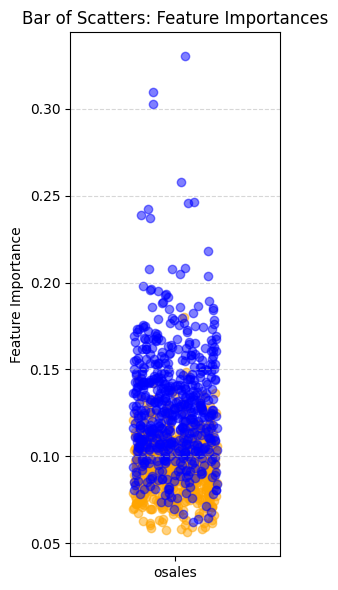

In [48]:
import matplotlib.pyplot as plt

# Create a "bar of scatters" plot with a single column 
plt.figure(figsize=(3, 6))

# Combine all columns into a single vertical column of scatter points
all_cols = random_cols + other_cols
all_vals = [dct[col] for col in all_cols]
all_colors = ['orange' if col in random_cols else 'blue' for col in all_cols]
all_jitter = np.random.uniform(-0.2, 0.2, size=len(all_cols))  # Add slight horizontal jitter for visual separation

# Plot scatter points
for i, (val, color) in enumerate(zip(all_vals, all_colors)):
    plt.scatter(0 + all_jitter[i], val, color=color, alpha=0.5)

# Enhance plot
plt.title("Bar of Scatters: Feature Importances")
plt.ylabel("Feature Importance")
plt.xticks([0], ["osales"])
plt.xlim(-0.5, 0.5)
# plt.legend(handles=[
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha=0.5, label='Random Columns'),
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', alpha=0.5, label='Other Columns')
# ])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [51]:
# Normalizing the dictionary values to sum to 1
total = sum(dct.values())
normalized_dct = {key: value / total for key, value in dct.items()}

In [52]:
import pickle

with open ('../data/processed/rf2_importances.pcl', 'wb') as fp:
  pickle.dump(normalized_dct, fp)

In [94]:
vspyct.predict(torch.Tensor(x_atp_test)).mean(axis=1)

tensor([[0.3660, 0.0000, 0.1556],
        [0.0909, 0.0000, 0.0000],
        [0.3400, 0.0889, 0.0000],
        [0.1064, 0.0000, 0.0000],
        [0.4578, 0.0000, 0.0000],
        [0.2730, 0.0000, 0.2111],
        [0.4232, 0.1333, 0.0000],
        [0.3556, 0.0000, 0.2667],
        [0.0489, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000],
        [0.2894, 0.0667, 0.0000],
        [0.1000, 0.0000, 0.0000],
        [0.0636, 0.0000, 0.0000],
        [0.0648, 0.0000, 0.0000],
        [0.1415, 0.0000, 0.0111],
        [0.3227, 0.0000, 0.2000],
        [0.0632, 0.0000, 0.0000],
        [0.2609, 0.0000, 0.2222],
        [0.0377, 0.0000, 0.0000],
        [0.4444, 0.0667, 0.0000],
        [0.0111, 0.0000, 0.0111],
        [0.3889, 0.0000, 0.1667]])

In [149]:
y_atp_test[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 3., 1., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 3., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 6., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 8., 1., 0., 0., 0., 0., 0., 0., 4., 0., 0.,
       1., 0., 0., 3., 0., 0., 4., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

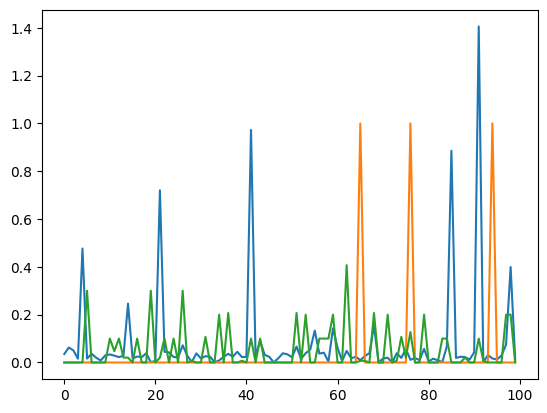

In [156]:
plt.plot(vspyct_preds.mean(axis=1)[:100,1])
plt.plot(y_atp_test[:100,1])
plt.plot(ensemble_spyct.predict(x_atp_test)[:100,1])

In [39]:
df.columns

Index(['timeunit', 'storageCost', 'interestRate', 'compidx0lt2',
       'compidx0lt2l1', 'compidx0lt2l2', 'compidx0lt2l4', 'compidx0lt2l8',
       'compidx1lt2', 'compidx2lt2',
       ...
       'Random_287', 'Random_288', 'Random_289', 'Random_290', 'Random_291',
       'Random_292', 'Random_293', 'Random_294', 'Random_295', 'Random_296'],
      dtype='object', length=592)

In [523]:
y_atp_test

array([[ 2.  , 20.  , 50.23],
       [20.5 , 48.2 , 49.3 ],
       [23.75, 58.  , 28.03],
       [23.  , 69.  , 30.43],
       [ 8.  , 30.  , 36.46],
       [23.5 , 60.  , 45.69],
       [22.  , 49.  , 29.63],
       [23.  , 58.  , 28.16],
       [ 0.  , 20.  , 41.14],
       [18.  , 48.  , 37.66],
       [17.5 , 48.  , 31.77],
       [21.25, 46.  , 36.32],
       [16.  , 26.  , 41.27],
       [17.  , 27.  , 32.84],
       [23.  , 55.  , 25.21],
       [ 0.  , 20.  , 44.08],
       [25.  , 69.  , 26.42],
       [14.5 , 20.  , 18.26],
       [26.5 , 78.  , 38.46],
       [19.  , 51.  , 38.46],
       [ 0.  , 20.  , 50.5 ]])

In [151]:
single_spyct.predict(x_atp_test)

array([[0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [4.        , 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [0.33333334, 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.6666667 , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [152]:
vspyct_preds = vspyct.predict(torch.Tensor(x_atp_test))

In [153]:
vspyct_preds.mean(axis=1)[:,0].shape

torch.Size([214])

In [154]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_atp_test, vspyct_preds.mean(axis=1)),\
  mean_absolute_error(y_atp_test, ensemble_spyct.predict(x_atp_test)),\
    mean_absolute_error(y_atp_test, single_spyct.predict(x_atp_test))

(0.19776731758470745, 0.18993016502114937, 0.18152035014396328)

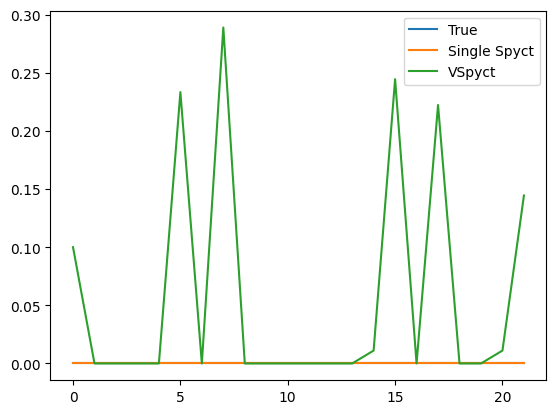

In [110]:
import matplotlib.pyplot as plt

i=2

plt.plot(y_atp_test[:100,i], label='True')
plt.plot(single_spyct.predict(x_atp_test)[:100,i], label='Single Spyct')
# plt.plot(ensemble_spyct.predict(x_atp_test)[:,i], label='Ensemble Spyct')
plt.plot(vspyct_preds.mean(axis=1)[:100,i], label='VSpyct')
plt.legend()

In [60]:
# import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score

for i in range(6):
  print(mean_absolute_error(y_atp_test[:,i], single_spyct.predict(x_atp_test)[:,i]), mean_absolute_error(y_atp_test[:,i], vspyct_preds.mean(axis=1)[:,i]))

0.23560217898339034 0.2320935455079262
0.22153846039794958 0.22651431703796754
0.06461538466123434 0.047493213823495


IndexError: index 3 is out of bounds for axis 1 with size 3

In [527]:
import numpy as np

def normalized_mae(y_true, y_pred):
    """
    Calculate the Normalized MAE for multi-target regression.
    
    Parameters:
    - y_true: numpy array of shape (n_samples, n_targets), ground truth values.
    - y_pred: numpy array of shape (n_samples, n_targets), predicted values.
    
    Returns:
    - normalized_mae: float, overall normalized MAE across all targets.
    """
    # Ensure the inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate absolute errors for each target
    abs_errors = np.abs(y_pred - y_true)
    
    # Calculate range (max - min) for each target
    ranges = y_true.max(axis=0) - y_true.min(axis=0)
    
    # Avoid division by zero: if range is zero, set to 1 (no normalization for that target)
    ranges[ranges == 0] = 1
    
    # Normalize errors by range
    normalized_errors = abs_errors / ranges
    
    # Calculate mean normalized error for each target
    mean_normalized_errors = normalized_errors.mean(axis=0)
    
    # Calculate overall normalized MAE (mean of normalized MAEs across targets)
    overall_normalized_mae = mean_normalized_errors.mean()
    
    return overall_normalized_mae

# # Example usage:
# y_true = np.array([[1, 100], [2, 200], [3, 300]])
# y_pred = np.array([[1.5, 110], [2.1, 190], [2.8, 310]])

# result = normalized_mae(y_true, y_pred)
# print(f"Normalized MAE: {result}")


In [528]:
normalized_mae(y_atp_test, single_spyct.predict(x_atp_test)), normalized_mae(y_atp_test, vspyct_preds.mean(axis=1))

(0.1821318450464455, 0.23919946852497345)

In [31]:
# mean_absolute_error(y_atp_test, vspyct_preds.mean(axis=1)),\
#   mean_absolute_error(y_atp_test, ensemble_spyct.predict(x_atp_test)),\
#     mean_absolute_error(y_atp_test, single_spyct.predict(x_atp_test))

In [553]:
mae_vspyct = normalized_mae(y_atp_test, vspyct_preds.mean(axis=1))
mae_spyct_single = normalized_mae(y_atp_test, single_spyct.predict(x_atp_test))
mae_spyct_ensemble = normalized_mae(y_atp_test, ensemble_spyct.predict(x_atp_test))

In [555]:
performance = [('vspyct', mae_vspyct), ('spyct_single', mae_spyct_single), ('spyct_ensemble', mae_spyct_ensemble)]

# save as pickle
import pickle
import os

os.makedirs('../final_results/mtr', exist_ok=True)

with open('../final_results/mtr/slump.pcl', 'wb') as f:
    pickle.dump(performance, f)

In [554]:
mae_vspyct, mae_spyct_ensemble, mae_spyct_single

(0.23919946852497345, 0.1657587808381458, 0.1821318450464455)

In [ ]:
import pickle

with open('../rf2_mae_vspyct.pcl', 'wb') as f:
  pickle.dump(mae_vspyct, f)

with open('../rf2_mae_spyct_single.pcl', 'wb') as f:
  pickle.dump(mae_spyct_single, f)

with open('../rf2_mae_spyct_ensemble.pcl', 'wb') as f:
  pickle.dump(mae_spyct_ensemble, f)


In [ ]:
# !pip install autorank

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

np.random.seed(42)
pd.set_option('display.max_columns', 7)
std = 0.3
means = [0.2, 0.3, 0.5, 0.8, 0.85, 0.9]
sample_size = 50
data = pd.DataFrame()
for i, mean in enumerate(means):
    data['pop_%i' % i] = np.random.normal(mean, std, sample_size).clip(0, 1)

In [ ]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

In [ ]:
plot_stats(result)
plt.show()

In [35]:
#load pickle file

import pickle
with open('../diabetes_f1_vspyct.pcl', 'rb') as f:
  mae_vspyct = pickle.load(f)

with open('../diabetes_f1_spyct_single.pcl', 'rb') as f:
  mae_spyct_single = pickle.load(f)

with open('../diabetes_f1_spyct_ensemble.pcl', 'rb') as f:
  mae_spyct_ensemble = pickle.load(f)


In [36]:
mae_vspyct, mae_spyct_single, mae_spyct_ensemble

(0.5932203389830509, 0.5354330708661418, 0.5982905982905983)